In [1]:
import pydiffmap.diffusion_map as dfm_est

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
epsilon = 'bgh'
nrneigh = 500
mydmap = dfm_est.DiffusionMap(n_evecs=5, epsilon=epsilon, alpha = 0.5, \
                                k=nrneigh)
#mydmap.fit_transform(x)

In [5]:
import mdtraj as md

In [13]:
index = np.arange(0,22)

In [41]:
traj = md.load_dcd('../../adp_openmm/trajectory.dcd', top = '/home/ppxasjsm/Projects/git/openmm/wrappers/python/tests/systems/alanine-dipeptide-explicit.pdb', stride=10, atom_indices=index)

In [42]:
coords = traj.xyz

In [43]:
dfm_est.DiffusionMap()

In [44]:
import rmsd

In [45]:
def myRMSDmetric(arr1, arr2):
    """
    This function is built under the assumption that the space dimension is 3!!!
    Requirement from sklearn radius_neighbors_graph: The callable should take two arrays as input and return one value indicating the distance between them.
     Input: One row from reshaped XYZ trajectory as number of steps times nDOF
     Inside: Reshape to XYZ format and apply rmsd as r=rmsd(X[i], X[j])
     Output: rmsd distance
    """

    #nParticles = len(arr1) / 3;
    #assert (nParticles == int(nParticles))

    #X1 = arr1.reshape(int(nParticles), 3 )
    #X2 = arr2.reshape(int(nParticles), 3 )

    X1 = arr1 -  rmsd.centroid(arr1)
    X2 = arr2 -  rmsd.centroid(arr2)

    return rmsd.kabsch_rmsd(X1, X2)

In [46]:
myRMSDmetric(coords[0], coords[1])

0.06412543567766295

In [53]:
def myRMSDmetric(arr1, arr2):
    """
    This function is built under the assumption that the space dimension is 3!!!
    Requirement from sklearn radius_neighbors_graph: The callable should take two arrays as input and return one value indicating the distance between them.
     Input: One row from reshaped XYZ trajectory as number of steps times nDOF
     Inside: Reshape to XYZ format and apply rmsd as r=rmsd(X[i], X[j])
     Output: rmsd distance
    """

    nParticles = len(arr1) / 3;
    assert (nParticles == int(nParticles))

    X1 = arr1.reshape(int(nParticles), 3 )
    X2 = arr2.reshape(int(nParticles), 3 )

    X1 = X1 -  rmsd.centroid(X1)
    X2 = X2 -  rmsd.centroid(X2)

    return rmsd.kabsch_rmsd(X1, X2)

In [55]:
epsilon=0.5

Xresh=coords.reshape(coords.shape[0], coords.shape[1]*coords.shape[2])
mydmap = dfm_est.DiffusionMap(n_evecs = 1, epsilon = epsilon, alpha = 0.5, k=100, metric=myRMSDmetric)
dmap = mydmap.fit_transform(Xresh)

In [61]:
phi = [1, 6, 8 ,14] #dihedral coordinates
psi = [6, 8, 14, 16]

In [65]:
dihedral = np.ndarray(shape=(2,4))
dihedral[0] = phi
dihedral[1] = psi

In [67]:
dih_traj = md.compute_dihedrals(traj, dihedral)

In [62]:
dihedral = []
for c in coords:
    a = _compute_torsion(c, phi[0],phi[1],phi[2],phi[3]).value_in_unit(degree)
    b = _compute_torsion(c, psi[0],psi[1],psi[2],psi[3]).value_in_unit(degree)
    dihedra.append(np.array([a,b]))

NameError: name 'nanometers' is not defined

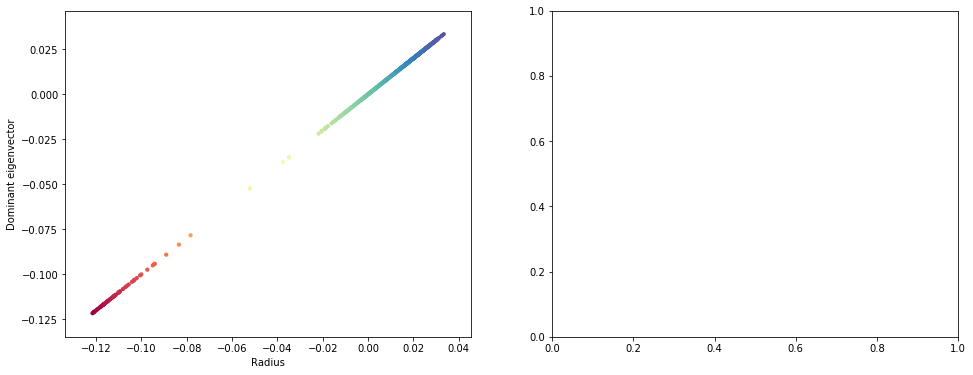

In [59]:
evecs = mydmap.evecs

fig = plt.figure(figsize=[16,6])
ax = fig.add_subplot(121)

ax.scatter(evecs[:,0], evecs[:,0], c=evecs[:,0], s=10, cmap=plt.cm.Spectral)
ax.set_xlabel('Radius')
ax.set_ylabel('Dominant eigenvector')

ax2 = fig.add_subplot(122)
#
#cax2 = ax2.scatter(compute_radius(traj), energy, c=evecs[:,0], s=10, cmap=plt.cm.Spectral)
#ax2.set_xlabel('Radius')
#ax2.set_ylabel('Potential Energy')
#cbar = fig.colorbar(cax2)
#cbar.set_label('Domninant eigenvector')
plt.show()

In [69]:
!conda install -c omnia/label/cuda91 openmm --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.6.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/ppxasjsm/miniconda3/envs/cvlearn

  added / updated specs: 
    - openmm


The following NEW packages will be INSTALLED:

    fftw3f: 3.3.4-2                http://conda.binstar.org/omnia
    openmm: 7.3.0-py36_cuda91_rc_1 omnia/label/cuda91            

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [2]:
import simtk.openmm as mm

In [3]:
import simtk.openmm as mm
platforms = [ mm.Platform.getPlatform(index).getName() for index in range(mm.Platform.getNumPlatforms()) ]
print (platforms)

['Reference', 'CPU', 'CUDA', 'OpenCL']
